In [6]:
import pandas as pd

In [7]:
!pip install pycaret
import pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 99.0 MB/s et

In [8]:
df = pd.read_csv('patient_data.csv')

In [9]:
df.head()

,Patient_No,Time_seconds,Heart_rate_bpm,Breadth_rate_bpm,SpO2_percent,Temp_celcius,Output
0,1,0,94.0,21.0,97.0,36.2,Normal
1,2,1,94.0,25.0,97.0,36.2,Normal
2,3,2,101.0,25.0,93.0,38.0,Abnormal
3,4,3,55.0,11.0,100.0,35.0,Abnormal
4,5,4,93.0,26.0,95.0,37.0,Normal


In [10]:
import pycaret

In [11]:
from pycaret.classification import *
df_new = setup(data = df,target="Output", remove_outliers = True, outliers_method='lof')

,Description,Value
0,Session id,483
1,Target,Output
2,Target type,Binary
3,Target mapping,"Abnormal: 0, Normal: 1"
4,Original data shape,"(25493, 7)"
5,Transformed data shape,"(24600, 7)"
6,Transformed train set shape,"(16952, 7)"
7,Transformed test set shape,"(7648, 7)"
8,Numeric features,6
9,Rows with missing values,1.1%


In [12]:
type(df_new)

df_new = df_new.dataset
df_updated = pd.DataFrame(df_new)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

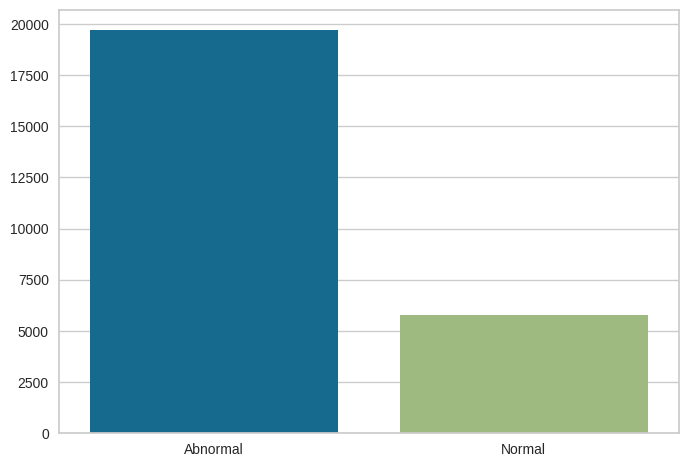

In [14]:
df['Output'].unique()
outputs = df["Output"].value_counts()

#visualising the output

sns.barplot(x=outputs.index, y=outputs.values)
plt.show()

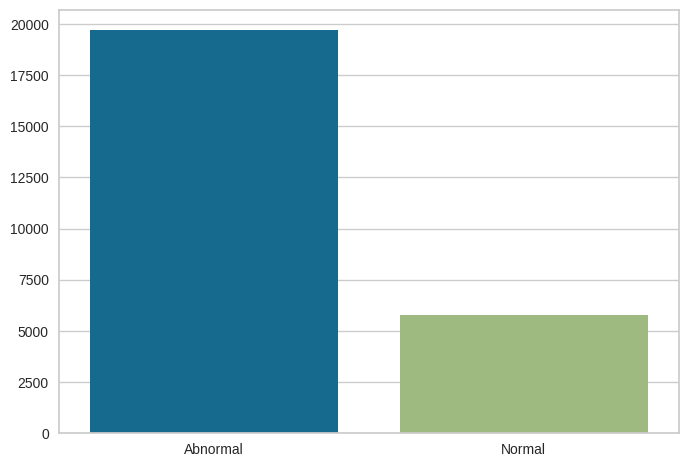

In [15]:
df_updated['Output'].unique()
outputs = df_updated["Output"].value_counts()

#visualising the output

sns.barplot(x=outputs.index, y=outputs.values)
plt.show()

In [16]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9996,1.0000,0.9988,0.9993,0.9990,0.9987,0.9987,0.6490
rf,Random Forest Classifier,0.9991,1.0000,0.9978,0.9983,0.9980,0.9974,0.9974,1.4560
lightgbm,Light Gradient Boosting Machine,0.9989,1.0000,0.9985,0.9966,0.9975,0.9968,0.9968,1.1150
xgboost,Extreme Gradient Boosting,0.9988,1.0000,0.9988,0.9958,0.9973,0.9965,0.9965,0.2690
gbc,Gradient Boosting Classifier,0.9986,1.0000,0.9983,0.9956,0.9969,0.9960,0.9960,1.8060
dt,Decision Tree Classifier,0.9985,0.9982,0.9975,0.9958,0.9967,0.9957,0.9957,0.4940
ada,Ada Boost Classifier,0.9957,0.9998,0.9921,0.9892,0.9906,0.9879,0.9879,0.6650
qda,Quadratic Discriminant Analysis,0.9895,0.9969,0.9736,0.9802,0.9768,0.9701,0.9701,0.1410
ridge,Ridge Classifier,0.9864,0.0000,0.9790,0.9618,0.9703,0.9615,0.9616,0.1370
lda,Linear Discriminant Analysis,0.9811,0.9967,0.9803,0.9392,0.9592,0.9469,0.9473,0.2470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9994,1.0000,0.9975,1.0000,0.9988,0.9984,0.9984
2,0.9989,1.0000,0.9975,0.9975,0.9975,0.9968,0.9968
3,0.9994,1.0000,1.0000,0.9975,0.9988,0.9984,0.9984
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9989,1.0000,0.9975,0.9975,0.9975,0.9968,0.9968
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

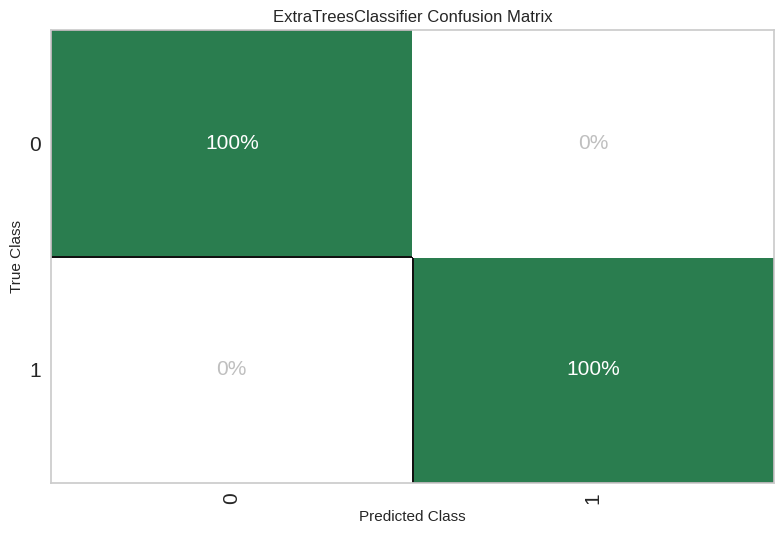

In [17]:
et = create_model('et')
plot_model(et, plot = "confusion_matrix", plot_kwargs={'percent': True})

In [18]:
predict_model(et,raw_score=True, data = df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9997,1.0000,0.9997,0.9997,0.9997,0.9991,0.9991


,Patient_No,Time_seconds,Heart_rate_bpm,Breadth_rate_bpm,SpO2_percent,Temp_celcius,Output,prediction_label,prediction_score_Abnormal,prediction_score_Normal
0,1,0,94.0,21.0,97.0,36.200001,1,Abnormal,0.61,0.39
1,2,1,94.0,25.0,97.0,36.200001,1,Abnormal,0.50,0.50
2,3,2,101.0,25.0,93.0,38.000000,0,Abnormal,0.85,0.15
3,4,3,55.0,11.0,100.0,35.000000,0,Abnormal,0.81,0.19
4,5,4,93.0,26.0,95.0,37.000000,1,Normal,0.42,0.58
...,...,...,...,...,...,...,...,...,...,...
25488,25489,476,56.0,12.0,101.0,33.000000,0,Normal,0.34,0.66
25489,25490,477,94.0,25.0,98.0,36.400002,1,Normal,0.01,0.99
25490,25491,478,94.0,21.0,97.0,36.200001,1,Normal,0.00,1.00
25491,25492,479,93.0,27.0,95.0,37.000000,1,Normal,0.15,0.85


In [19]:
df

,Patient_No,Time_seconds,Heart_rate_bpm,Breadth_rate_bpm,SpO2_percent,Temp_celcius,Output
0,1,0,94.0,21.0,97.0,36.2,Normal
1,2,1,94.0,25.0,97.0,36.2,Normal
2,3,2,101.0,25.0,93.0,38.0,Abnormal
3,4,3,55.0,11.0,100.0,35.0,Abnormal
4,5,4,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...,...,...
25488,25489,476,56.0,12.0,101.0,33.0,Abnormal
25489,25490,477,94.0,25.0,98.0,36.4,Normal
25490,25491,478,94.0,21.0,97.0,36.2,Normal
25491,25492,479,93.0,27.0,95.0,37.0,Normal


In [20]:
df_new = df.drop(['Time_seconds'],axis=1)

In [21]:
df_new

,Patient_No,Heart_rate_bpm,Breadth_rate_bpm,SpO2_percent,Temp_celcius,Output
0,1,94.0,21.0,97.0,36.2,Normal
1,2,94.0,25.0,97.0,36.2,Normal
2,3,101.0,25.0,93.0,38.0,Abnormal
3,4,55.0,11.0,100.0,35.0,Abnormal
4,5,93.0,26.0,95.0,37.0,Normal
...,...,...,...,...,...,...
25488,25489,56.0,12.0,101.0,33.0,Abnormal
25489,25490,94.0,25.0,98.0,36.4,Normal
25490,25491,94.0,21.0,97.0,36.2,Normal
25491,25492,93.0,27.0,95.0,37.0,Normal


In [22]:
null = df[df.isnull().any(axis =1)]
print(null)

       Patient_No  Time_seconds  Heart_rate_bpm  Breadth_rate_bpm  \
111           112           111            92.0              23.0   
112           113           112            92.0              23.0   
113           114           113            92.0              23.0   
114           115           114            92.0              22.0   
115           116           115            92.0              22.0   
...           ...           ...             ...               ...   
21000       21001           317            89.0              17.0   
21001       21002           318            89.0              17.0   
21002       21003           319            89.0              17.0   
21003       21004           320            89.0              17.0   
21004       21005           321            89.0              17.0   

       SpO2_percent  Temp_celcius    Output  
111             NaN          29.0    Normal  
112             NaN          29.0    Normal  
113             NaN          40.0

In [23]:
df = df.dropna()
df= df.sample(frac=1.0, random_state = 42)
# df = df.drop(['Time_seconds'],axis=1)
y=df['Output']
X=df.drop(['Output','Patient_No'],axis=1)

X.iloc[467]

Time_seconds        378.0
Heart_rate_bpm       88.0
Breadth_rate_bpm     17.0
SpO2_percent         98.0
Temp_celcius         41.0
Name: 21061, dtype: float64

In [24]:
from pycaret.classification import *

In [25]:
X.head()

,Time_seconds,Heart_rate_bpm,Breadth_rate_bpm,SpO2_percent,Temp_celcius
4067,219,76.0,20.0,93.0,35.0
15992,119,81.0,20.0,99.0,46.0
8199,22,90.0,18.0,98.0,36.0
15850,458,85.0,22.0,92.0,43.0
13335,348,84.0,17.0,100.0,41.0


In [26]:
X.describe()

,Time_seconds,Heart_rate_bpm,Breadth_rate_bpm,SpO2_percent,Temp_celcius
count,25214.000000,25214.000000,25214.000000,25214.000000,25214.000000
mean,240.160030,89.309907,17.663996,96.698144,37.597755
std,138.887615,13.147755,3.574010,3.324440,5.228482
min,-1.000000,44.000000,0.000000,83.000000,21.000000
25%,120.000000,81.000000,16.000000,95.000000,34.000000
50%,240.000000,89.000000,18.000000,97.000000,38.000000
75%,360.000000,95.000000,20.000000,99.000000,41.000000
max,480.000000,139.000000,34.000000,111.000000,49.000000


In [27]:
y.describe()

count        25214
unique           2
top       Abnormal
freq         19440
Name: Output, dtype: object

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

resampling_pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy = 0.85))
])

X_resampled,y_resampled = resampling_pipeline.fit_resample(X,y)

In [29]:
resampled_df = pd.DataFrame(data=X_resampled, columns=X.columns)
resampled_df['Output'] = y_resampled

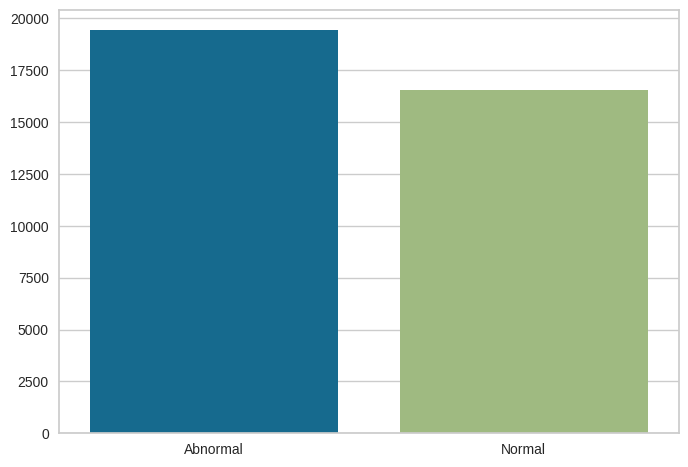

In [30]:
resampled_df['Output'].unique()
outputs = resampled_df["Output"].value_counts()

#visualising the output

sns.barplot(x=outputs.index, y=outputs.values)
plt.show()

In [31]:
resampled_df.describe()

,Time_seconds,Heart_rate_bpm,Breadth_rate_bpm,SpO2_percent,Temp_celcius
count,35964.000000,35964.000000,35964.000000,35964.000000,35964.000000
mean,240.403153,89.063573,17.759762,96.755127,35.307743
std,139.846924,12.291831,3.523049,3.163531,5.738747
min,-1.000000,44.000000,0.000000,83.000000,21.000000
25%,119.750000,81.000000,16.000000,95.000000,30.000000
50%,241.000000,89.015741,18.000000,97.000000,36.000000
75%,361.250000,94.000000,20.000000,99.000000,40.000000
max,480.000000,139.000000,34.000000,111.000000,49.000000


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)




In [33]:
df_train = setup(data = resampled_df, target = "Output", preprocess=False)
best = compare_models()

,Description,Value
0,Session id,6525
1,Target,Output
2,Target type,Binary
3,Original data shape,"(35964, 6)"
4,Transformed data shape,"(35964, 6)"
5,Transformed train set shape,"(25174, 6)"
6,Transformed test set shape,"(10790, 6)"
7,Numeric features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9992,0.9999,0.9992,0.9992,0.9992,0.9984,0.9984,0.9720
lightgbm,Light Gradient Boosting Machine,0.9990,1.0000,0.9990,0.9990,0.9990,0.9980,0.9980,1.1550
rf,Random Forest Classifier,0.9988,0.9999,0.9988,0.9988,0.9988,0.9975,0.9975,1.7810
dt,Decision Tree Classifier,0.9978,0.9978,0.9978,0.9978,0.9978,0.9956,0.9956,0.2160
gbc,Gradient Boosting Classifier,0.9940,0.9996,0.9940,0.9941,0.9940,0.9880,0.9881,2.2120
knn,K Neighbors Classifier,0.9887,0.9989,0.9887,0.9887,0.9887,0.9772,0.9773,0.3850
ada,Ada Boost Classifier,0.9881,0.9992,0.9881,0.9882,0.9881,0.9761,0.9761,2.0190
qda,Quadratic Discriminant Analysis,0.9729,0.9955,0.9729,0.9730,0.9730,0.9456,0.9456,0.1220
nb,Naive Bayes,0.9702,0.9946,0.9702,0.9703,0.9703,0.9401,0.9402,0.2120
lr,Logistic Regression,0.9689,0.9963,0.9689,0.9689,0.9689,0.9374,0.9374,0.2200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [34]:
rf = create_model("rf")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9968,0.9995,0.9968,0.9968,0.9968,0.9936,0.9936
2,0.9984,1.0000,0.9984,0.9984,0.9984,0.9968,0.9968
3,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
4,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
5,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
6,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
7,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
8,0.9976,1.0000,0.9976,0.9976,0.9976,0.9952,0.9952


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
rf = create_model("rf")
light_gbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9968,0.9995,0.9968,0.9968,0.9968,0.9936,0.9936
2,0.9984,1.0000,0.9984,0.9984,0.9984,0.9968,0.9968
3,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
4,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
5,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
6,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
7,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
8,0.9976,1.0000,0.9976,0.9976,0.9976,0.9952,0.9952


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9984,1.0000,0.9984,0.9984,0.9984,0.9968,0.9968
1,0.9984,1.0000,0.9984,0.9984,0.9984,0.9968,0.9968
2,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9992,1.0000,0.9992,0.9992,0.9992,0.9984,0.9984
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9988,1.0000,0.9988,0.9988,0.9988,0.9976,0.9976
7,0.9980,1.0000,0.9980,0.9980,0.9980,0.9960,0.9960
8,0.9984,1.0000,0.9984,0.9984,0.9984,0.9968,0.9968


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

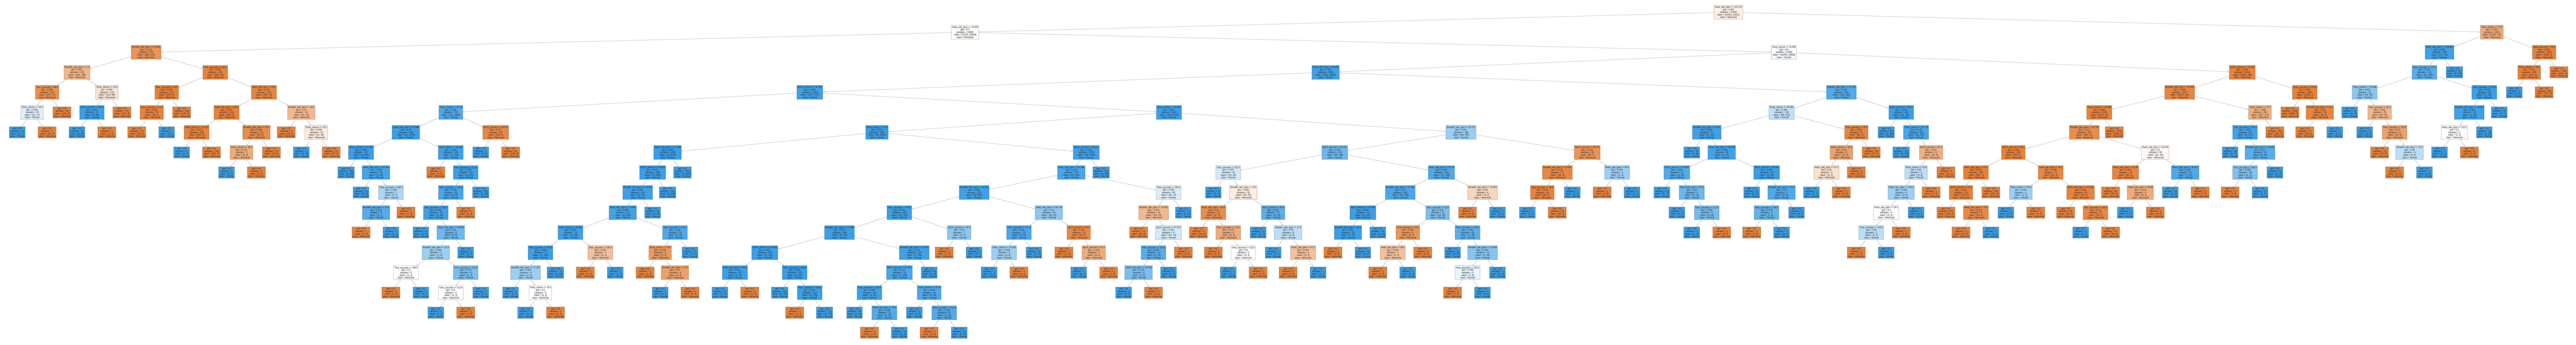

In [48]:
from sklearn.tree import plot_tree

tree = rf[0]

plt.figure(figsize=(150,20))
tree = plot_tree(tree, filled =True, feature_names= resampled_df.columns[:-1], class_names=[str(i) for i in resampled_df["Output"].unique()])
# plt.savefig("random_forest_tree.jpg")

In [49]:
plt.savefig("random_forest.jpg")

<Figure size 800x550 with 0 Axes>